## CH 03-2 k-최근접 이웃 회귀

지도 학습 알고리즘
* 분류 : 샘플을 몇 개의 클래스 중 하나로 분류
* 회귀 : 임의의 어떤 숫자를 예측 ex. 내년도 경제 성장률 예측

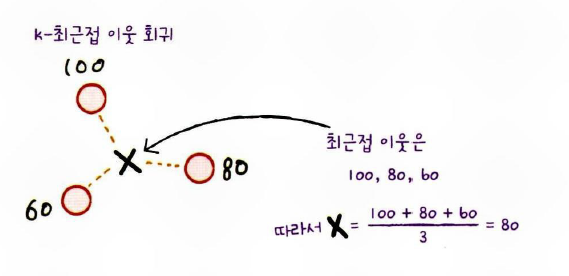

In [243]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

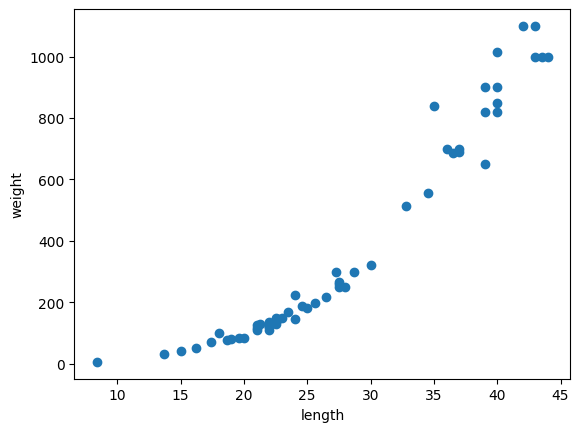

In [244]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [245]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

사이킷런에 사용할 훈련세트는 2차원 배열이어야 함
* reshape() : 넘파일 배열에서 크기를 바꿀 수 있는 메서드

예시 : 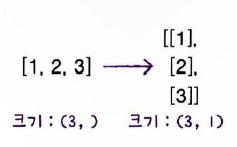

In [246]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

test_array = test_array.reshape(2, 2)
print(test_array.shape)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(4,)
(2, 2)
(42, 1) (14, 1)


### 결정계수(R²)
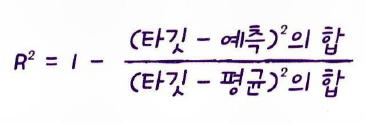

타깃의 평균 정도를 예측하는 수준이면 0에 가까워짐

예측이 타킷에 가까워지면 1에 가까워짐

In [247]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()  # 사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))  # 정답을 맞힌 개수의 비율

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)  # 결과에서 예측이 평균적으로 어느 정도 다른지 확인

0.992809406101064
19.157142857142862


### 과대적합 vs 과소적합
* 과대적합 : 훈련 세트에만 잘 맞음, 실전에 투입하여 새로운 샘플에 대한 예측 잘 못함
* 과소적합 : 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우

In [248]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


## CH 03-2 선형회귀

In [249]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [250]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))  # 실제 농어의 무게와의 차이 발생


[1033.33333333]


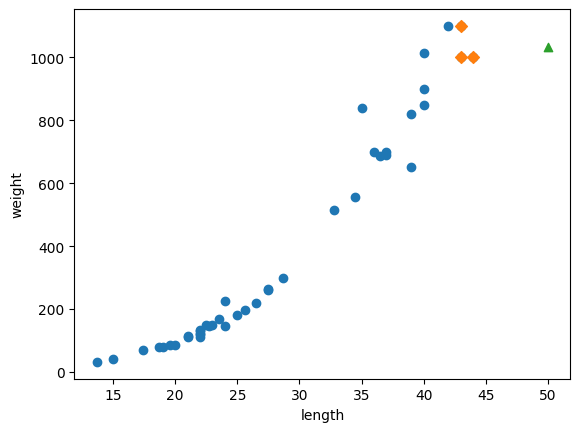

In [251]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

1033.3333333333333
[1033.33333333]


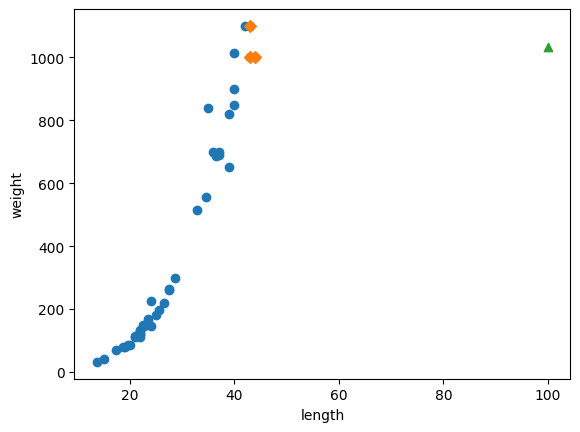

In [252]:
print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))

distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형 회귀 (linear regression)
: 특성이 하나인 경우 어떤 직선(특성을 가장 잘 나타낼수 있는)을 학습하는 알고리즘

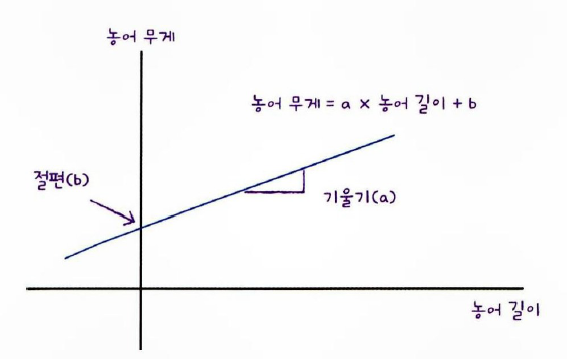

In [253]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))

# LinearRegression 클래스가 찾은 a, b는 lr 객체의 coef_ , intercept_ 속성에 저장
print(lr.coef_, lr.intercept_) 

[1241.83860323]
[39.01714496] -709.0186449535477


머신 러닝에서 기울기를 계수(coefficient) 또는 가중치(weight)라고 부름
* 모델 파라미터 : coef_ 와 intercept_, 머신 러닝 알고리즘이 찾은 값
* 모델 기반 학습 : 최적의 모델 파라미터 찾는 것
* 사례 기반 학습 : 훈련 세트를 저장하는 것 (파라미터 x)

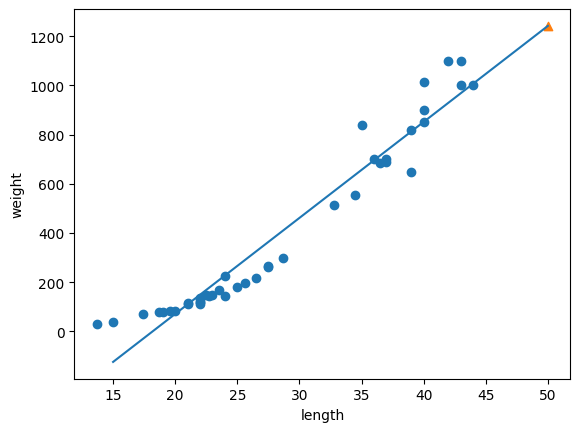

In [254]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [255]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


### 다항 회귀 (polynomial regression)
: 다항식을 사용한 선형 회귀

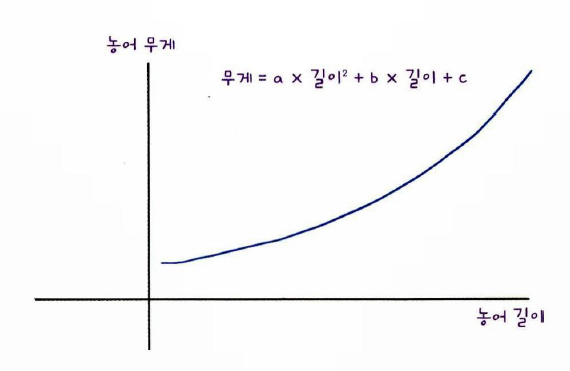

In [256]:
train_poly = np.column_stack((train_input ** 2, train_input))  # column_stack 함수 사용하여 2차원 배열 만듦
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


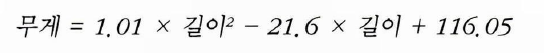

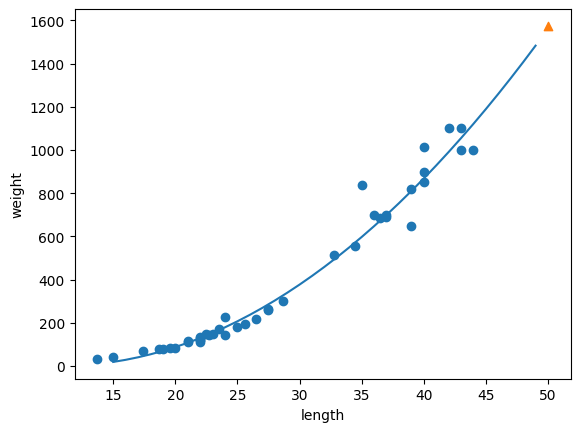

In [257]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [258]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


## CH 03-3 특성 공학과 규제

### 다중 회귀
: 여러 개의 특성을 사용한 선형 회귀

### 특성 공학
: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [259]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [260]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [261]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =train_test_split(
    perch_full, perch_weight, random_state=42)

### 사이킷런의 변환기
사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스(변환기) 제공

- 변환기 클래스 : fit( ), transform( ) 제공

In [262]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


* fit( ) 메서드 : 새롭게 만들 특성 조합을 찾음
* transform( ) 메서드 : 실제로 데이터를 변환
* PolynomialFeatures 클래스 : 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항 추가

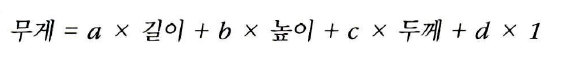

사이킷런의 선형 모델은 자동으로 절편을 추가하므로 특성을 만들 필요 없음

In [263]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

# train_input을 변환한 데이터를 train_poly에 저장하고 배열의 크기 확인
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

[[2. 3. 4. 6. 9.]]
(42, 9)


In [264]:
# 9개의 특성이 각각 어떤 입력의 조화로 만들어졌는지 확인
poly.get_feature_names_out() 

test_poly = poly.transform(test_input)

다중 회귀 모델 훈련하기

In [265]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [266]:
print(lr.score(test_poly, test_target))

0.9714559911594111


PolynomialFeatures 클래스의 degree 매개 변수를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있음

In [267]:
# 5제곱까지 특성을 만들어 출력하기
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [268]:
# 다시 선형 회귀 모델 훈련
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


### 규제 
: 머신 러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것

* 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
* 선형 회귀 모델의 경우, 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 것

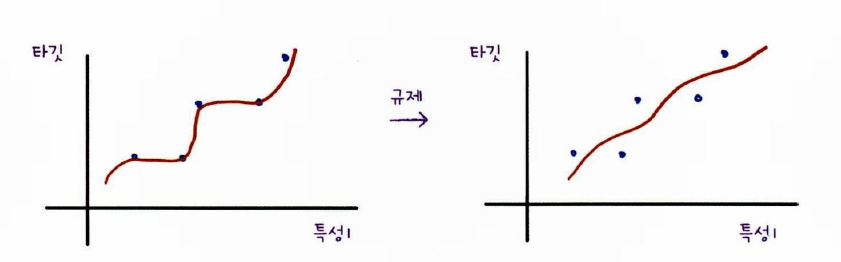

In [269]:
# StandardScaler 클래스 사용
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀
* sklearn.linear_model 패키지에 존재
* 모델 객체를 만들고 fit( ) 메서드에서 훈련한 다음 score( ) 메서드로 평가

In [270]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


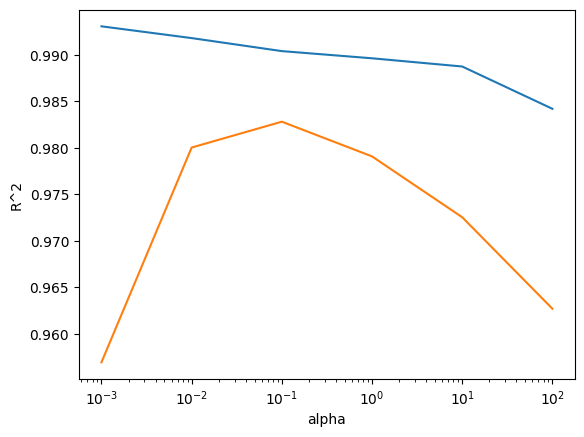

In [271]:
# alpha 값에 대한 R² 값의 그래프를 그려보기
import matplotlib.pyplot as plt
train_score =[]
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [272]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 회귀
* Ridge 클래스를 Lasso 클래스로 바꿈

In [273]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [274]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1 , 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha,max_iter=10000)  # 라쏘 모델 만듦
    lasso.fit(train_scaled, train_target)  # 라쏘 모델 훈련
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/user/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/user/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


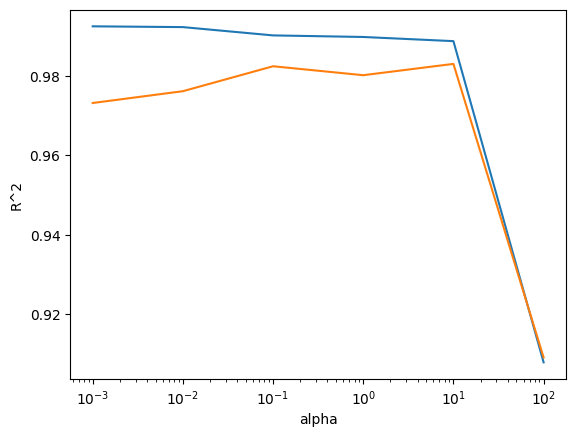

In [275]:
# train_score와 test_score 리스트를 사용해 그래프 그리기
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [276]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ == 0))  # 라쏘 모델의 계수는 coef_ 속성에 저장되어 있음

0.9888067471131867
0.9824470598706695
40
